# Supervised and unsupervised learning with kernels - practical

In this notebook, we will cover implementation details and applications for two problems:
    
* Kernel ridge regression on toy data
* Kernel principal component analysis
* Application for denoising MNIST digits


The notebook contains a number of `# IMPLEMENT` comments, where you are supposed to insert missing code yourself.
We also prepared a solution notebook that contains the code we envisioned.


In [2]:
import numpy as np
import pickle as pkl
from scipy import optimize
from scipy.linalg import cho_factor, cho_solve
import matplotlib.pyplot as plt
from utils import plotRegression, plot_multiple_images, scatter_label_points, loadMNIST

%matplotlib inline



# Kernel Ridge Regression

## Loading data

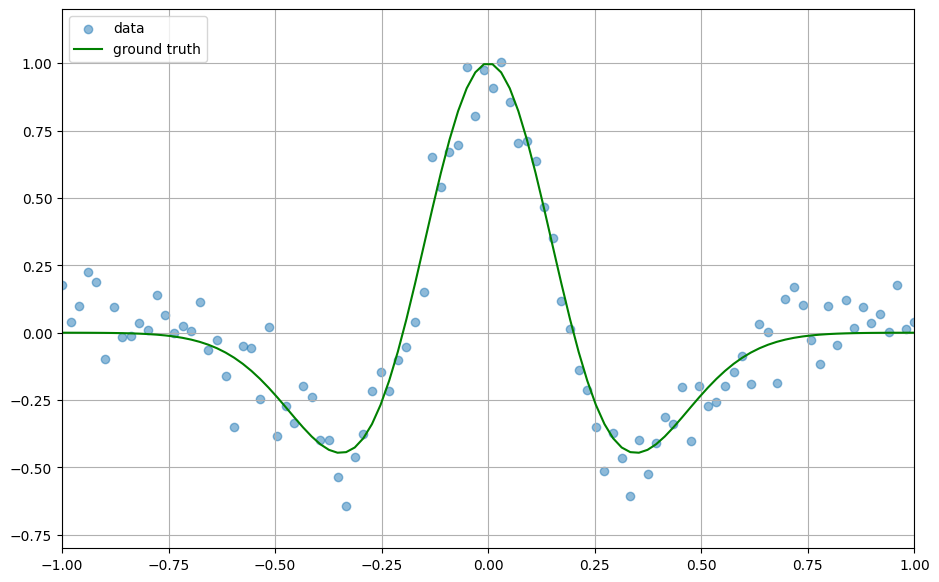

In [3]:
file = open('datasets/regression_datasets', 'rb')
datasets = pkl.load(file)
file.close()
train_set = datasets['dataset_1']['train']
test_set = datasets['dataset_1']['test']
plotRegression(train_set['x'], train_set['y'],Y_clean= train_set['y_clean'])


## I- Implementing the Gaussian Kernel
Implement the method 'kernel' of the class RBF below, which takes as input two data matrices $X$ and $Y$ of size $N\times d$ and $M\times d$ and returns a gramm matrix $G$ of shape $N\times M$ whose components are $k(x_i,y_j) = \exp(-\Vert x_i-y_j\Vert^2/(2\sigma^2))$. (The fastest solution does not use any for loop!)

In [3]:
class RBF:
    def __init__(self, sigma=1.):
        self.sigma = sigma  ## the variance of the kernel
    def kernel(self,X,Y):
            

In [4]:
class Laplace:
    def __init__(self, sigma=1.):
        self.sigma = sigma  ## the variance of the kernel
    def kernel(self,X,Y):
        return # IMPLEMENT

In [5]:
class Linear:
    def kernel(self,X,Y):
        return np.einsum('ni,mi->nm',X,Y)

## II- Implementing the regressor
Implement the method 'fit' of the classes KernelRR and MultivariateKernelRR below to perform Kernel Ridge Regression. Here, we consider a version of KRR that allows an offset parameter $b$, i.e.    $$\min_{f,b} \frac{1}{2N}\sum_{i=1}^N\Vert y_i - f(x_i)-b \Vert^2 + \frac{1}{2} \lambda  \Vert f \Vert^2$$


In [6]:
class KernelRR:
    
    def __init__(self,kernel,lmbda):
        # kernel: a callable that takes arrays X,Y of shape (n,d) and (m,d) and return a Gramm matrix of shape (n,m)
        # lmbda: the regularization parameter, must be positive 
        self.lmbda = lmbda                    
        self.kernel = kernel    
        self.alpha = None 
        self.b = None
        self.type='ridge'
        self.data = None 
        
    def fit(self, X, y):
        # X: input array of shape (n,d)
        # y: output of shape (n,) or (n,d)
        if len(y.shape)==1:
            y = np.expand_dims(y, axis=1)
        
        self.b =  # IMPLEMENT # Offset
        self.alpha = # IMPLEMENT: coeffecicient of the kernel method
        self.data =  # IMPLEMENT
        
    def predict(self,x):
        # Input : matrix x of shape N data points times d dimension
        # Output: vector of size (n,) or (n,d) predicting the target y.
        
        pred = # IMPLEMENT
        if pred.shape[1]==1:
            return pred[:,0]
        else:
            return pred
        
        
        return pred

    

## III - Fitting the regressor

Run the code block below to fit the regressor and report its output.

### a) Linear Kernel

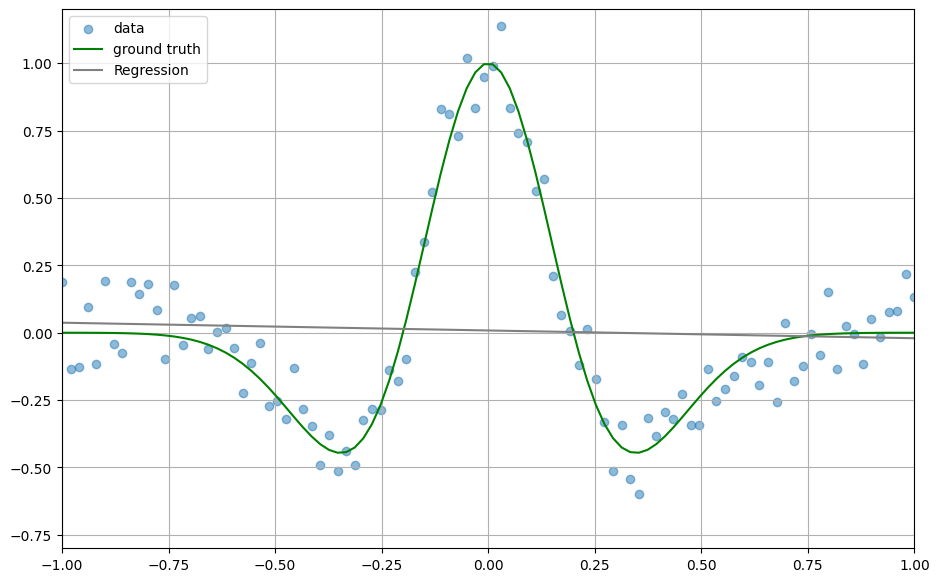

In [7]:
lmbda = .1
kernel = Linear().kernel
model = KernelRR(kernel, lmbda=lmbda)
model.fit(train_set['x'].reshape(-1,1),train_set['y'])
plotRegression(train_set['x'], train_set['y'], Y_clean= train_set['y_clean'], model=model, label='Train')

### b) Nonlinear Kernel

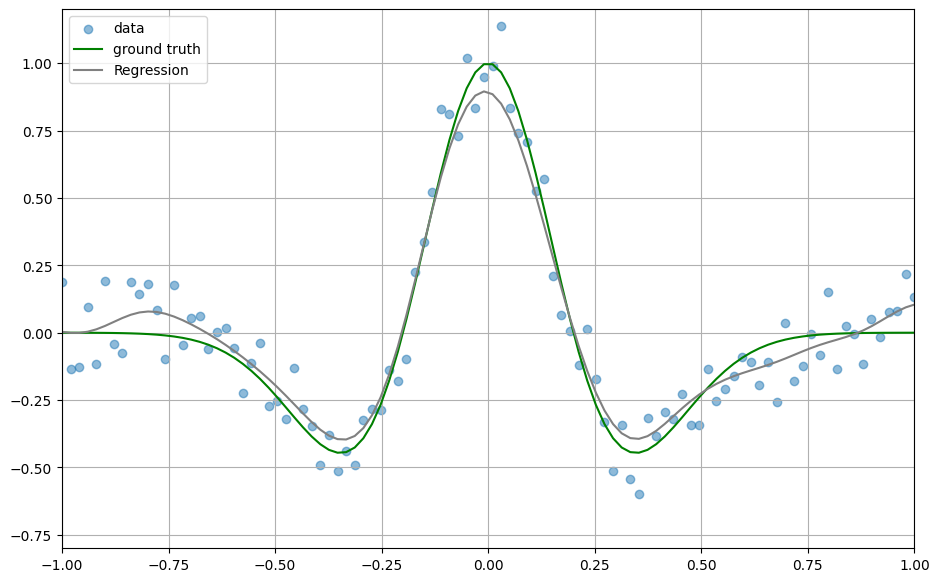

In [8]:
sigma = .1
lmbda =1.
kernel = RBF(sigma).kernel
model = KernelRR(kernel, lmbda=lmbda)
model.fit(train_set['x'].reshape(-1,1),train_set['y'])
plotRegression(train_set['x'], train_set['y'], Y_clean= train_set['y_clean'], model=model, label='Train')

# Kernel PCA

### 1- Implementing kernel PCA

Hint: Given a kernel $K$ and a training set $(x_i)_{1\leq i \leq N}$, the centered kernel $\tilde{K}$ satisfies $\tilde{K}(x,y) = \langle K_x-\mu, K_y-\mu \rangle_{\mathcal{H}}$, where $\mu = \frac{1}{N}\sum_{i=1}^N K_{x_i}$



In [9]:
class KernelPCA:
    
    def __init__(self,kernel, r_min=0,r_max=2):
        # Performs a kernel PCA and projects on the principal components of rank between r_min and r_max
        # kernel: a kernel function
        # r_min:  Principal component with higher variance
        # r_max: Principal component with lower variance
        self.kernel = kernel          # <---
        self.data = None # Training points on which kernel PCA is computed
        self.alpha = None # Matrix of shape N times r representing the r coefficients of the r principal components of rank between  r_min and r_max. Here r = r_max-r_min
        self.r_max =r_max
        self.r_min = r_min
    def centered_kernel(self,X,Y):
        if self.data is None:
            raise Exception("Impossible to compute centered kernel: training data is unavailable!")
        else:
            return # IMPLEMENT: centered kernel matrix so that 
        
    def fit(self, X):
        self.data = X

        self.alpha = # IMPLEMENT
        
    def transform(self,x):
        # Input : matrix x of shape N data points times d dimension
        # Output: matrix of shape N times (r_max-r_min)

        return # IMPLEMENT
    


### 2- Performing kernel PCA

Run the code block below apply a kernel PCA to a dataset consisting of three concentric rings and report the output. What can you conclude about this dataset?

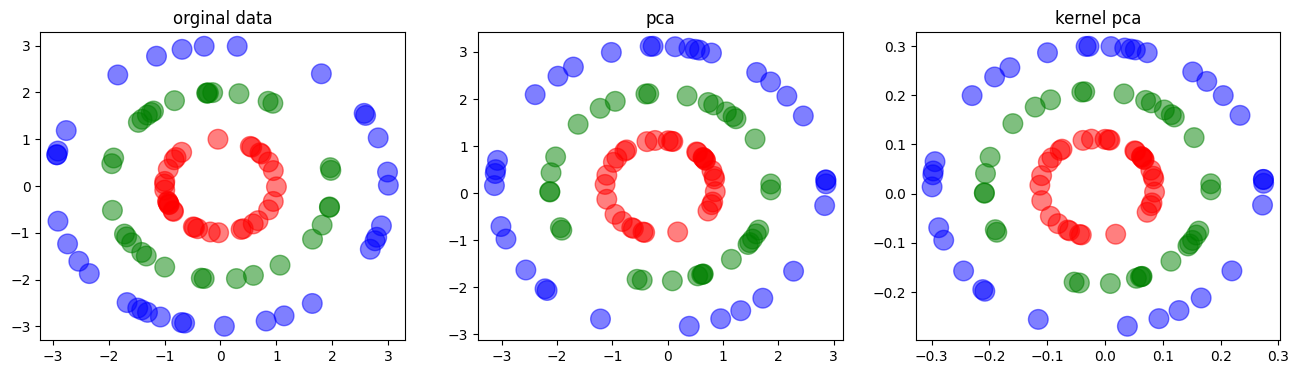

In [10]:
file = open('datasets/pca_datasets', 'rb')
datasets = pkl.load(file)
file.close()
train_set = datasets['dataset_1']['train']
test_set = datasets['dataset_1']['test']

train_X = train_set["x"]
test_X = test_set["x"]
train_Y = train_set["y"]
test_Y = test_set["y"]


r_min = 0 ### Try different values (ex: 1)
r_max = r_min+2


kernel = Linear().kernel
pca = KernelPCA(kernel,  r_min=r_min, r_max=r_max)
pca.fit(train_X)
pca_components = pca.transform(test_X)

sigma =10.
kernel = RBF(sigma).kernel
pca = KernelPCA(kernel, r_min=r_min, r_max=r_max)
pca.fit(train_X)
rbf_pca_components = pca.transform(test_X)



fig, ax = plt.subplots(1,3, figsize=(16, 4))
scatter_label_points(test_X, test_Y, ax[0], title='orginal data')
scatter_label_points(pca_components,test_Y, ax[1], title= 'pca')
scatter_label_points(rbf_pca_components,test_Y, ax[2], title= 'kernel pca')



# Denoising 
### 1- Implementing a denoiser based on Kernel PCA and Kernel Ridge Regression
Implement the methods 'fit' and 'denoise' of the classes Denoiser below. 

In [11]:
class Denoiser:
    def __init__(self, kernel_encoder, kernel_decoder,dim_pca, lmbda):
        self.pca = KernelPCA(kernel_encoder, r_min=0, r_max=dim_pca)
        self.ridge_reg = KernelRR(kernel_decoder, lmbda= lmbda)
    
    def fit(self,train):
        flat_shape = train.shape[1]*train.shape[2]
        flat_train = train.reshape(-1,flat_shape)
        ### IMPLEMENT: projection of the data onto the dim_pca principal components
        pca_components = ### IMPLEMENT: kernel PCA projection of the data
        ### Learn to predict noisy images from their pca projections using kernel ridge regression. 
        self.ridge_reg.fit(pca_components, flat_train)
        
    def denoise(self,test):
        ## test: Noisy tensors of shape (N,p,p)
        ## output: Denoised tensor of shape (N,p,p)
        return ### IMPLEMENT: Implement a denoising procedure using kernel pca and ridge regression

### 2- Denoising MNIST dataset

Run the code block below to perform denoising of a subset of MNIST digits dataset and report the output. To what extend the denoising is successfull? How can it be improved?

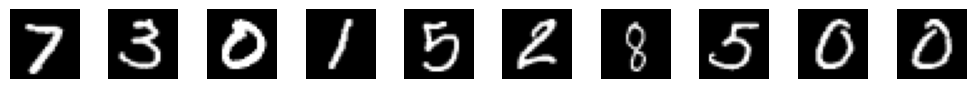

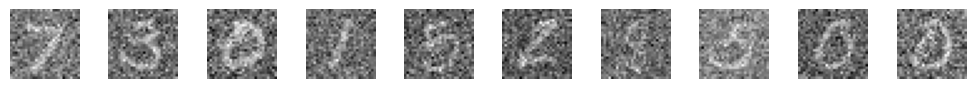

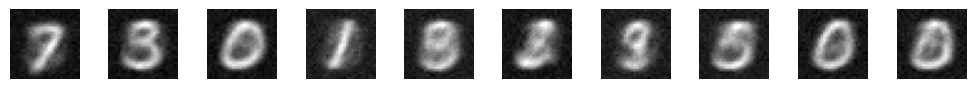

In [12]:
datasets = loadMNIST('datasets/SubsetMNIST')
clean_data = datasets['cleanMNIST']
data = datasets['noisyMNIST']


dim_pca =100
lmbda = 10.
sigma_encoder =8.
sigma_decoder =.5
kernel_encoder = RBF(sigma_encoder).kernel
kernel_decoder = RBF(sigma_decoder).kernel
denoiser = Denoiser(kernel_encoder,kernel_decoder,dim_pca, lmbda)

denoiser.fit(data['train'])
pred = denoiser.denoise(data['test'])

plot_multiple_images(clean_data['test'])
plot_multiple_images(data['test'])
plot_multiple_images(pred)